<a href="https://colab.research.google.com/github/Tsxkii/AstroDataAnalysis/blob/main/RotationCurveAddingMilkyWayComps(Week4Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import astropy.units as u
import astropy.constants as ac
import numpy as np
import matplotlib.pyplot as plt


In [3]:
G = ac.G
M_Bulge = 1e10 * u.solMass #Mass of Bulge
r = .1*u.kpc #Radius of bulge

In [4]:
def cal_Orbital_V(M, r):
  """
  Function to cal orbitabl velo
  M, Mass of the object
  R, Radius of the object
  """

  V = np.sqrt((ac.G*M)/r)
  return(V)

In [5]:
print(G.si)
print(M_Bulge)
print(r)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018
10000000000.0 solMass
0.1 kpc


In [6]:
r_arr = np.arange(1, 30) * u.kpc # Define a range of orbital radius in kilo parsec
V_arr = cal_Orbital_V(M_Bulge, r_arr) #Calc. Orbital Velo
print(V_arr.to(u.km/u.s)) #Orbitbal Velo in km/s

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


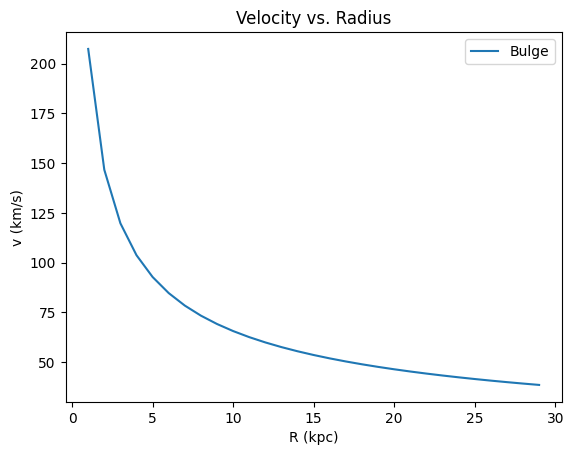

In [7]:
plt.plot(r_arr.to(u.kpc), V_arr.to(u.km/u.s), label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.title("Velocity vs. Radius")
plt.legend() # to show the legend of a figure
# The combination of labels and legend will come handy to show differnt curves in a plot as shown in future figures.
plt.show()
#

In [8]:
!pip install astropy
import astropy.units as u
M_disk = 1e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2))


318.3098861837907 1e+06 solMass / kpc2


In [9]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [10]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

999.0264638415543 1e+06 solMass at 1 kpc
24975.66159603886 1e+06 solMass at 5 kpc


In [11]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_Bulge
    return(M_total)


In [12]:
# redefine v_bulge_arr to avoid confusion

v_bulge_arr = cal_Orbital_V(M_Bulge, r_arr)


In [13]:
# Define arrays to be calculated
M_disk = np.zeros(len(r_arr)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(r_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(r_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(r_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(r_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = cal_Orbital_V(M_disk, r_arr)
v_bulge_disk_arr = cal_Orbital_V(M_total, r_arr)

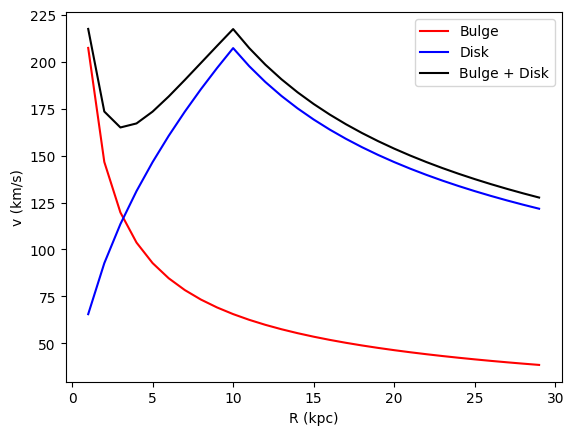

In [14]:
plt.plot(r_arr.to(u.kpc), V_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(r_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(r_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()


In [20]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

# Define constants for the NFW profile
D_Halo = 1e6 * u.solMass / u.kpc**3  # Characteristic density for halo
R_Halo = 20 * u.kpc  # Scale radius for halo

def calculatingEnclosedMassForHalo(R, D_Halo=D_Halo, R_Halo=R_Halo):
    """
    Calculate the enclosed mass for the halo component based on the NFW profile.
    Input: R - orbital radius
    Output: M_halo - enclosed mass for halo
    """
    # Calculate the enclosed mass using the NFW profile
    M_halo = 4 * np.pi * D_Halo * R_Halo**3 * (np.log(1 + R / R_Halo) - (R / (R_Halo + R)))
    return M_halo

In [21]:
print(calculatingEnclosedMassForHalo(1 * u.kpc).to(0.01 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForHalo(5 * u.kpc).to(0.01 * u.solMass), "at 5 kpc")

11773347683.79249 0.01 solMass at 1 kpc
232664354517.43924 0.01 solMass at 5 kpc


In [22]:
R_arr = np.arange(0.1, 30, 1) * u.kpc
M_halo = np.zeros(len(R_arr)) * u.solMass
M_disk = np.zeros(len(R_arr)) * u.solMass
M_total = np.zeros(len(R_arr)) * u.solMass


In [23]:
for i in np.arange(len(R_arr)):
    M_halo[i] = calculatingEnclosedMassForHalo(R_arr[i])
v_halo_arr = cal_Orbital_V(M_halo, R_arr)

In [24]:
print(v_halo_arr.to(u.km/u.s))

[ 7.32725212 23.52586265 31.51130726 37.16154435 41.53028892 45.05914249
 47.98632085 50.45861498 52.57429913 54.40300105 55.99612324 57.39281599
 58.62363678 59.71291168 60.68032369 61.54201785 62.31139227 62.99967782
 63.61637178 64.16956791 64.66621163 65.11229991 65.51303979 65.87297541
 66.1960908  66.48589379 66.74548503 66.97761516 67.18473255 67.36902331] km / s


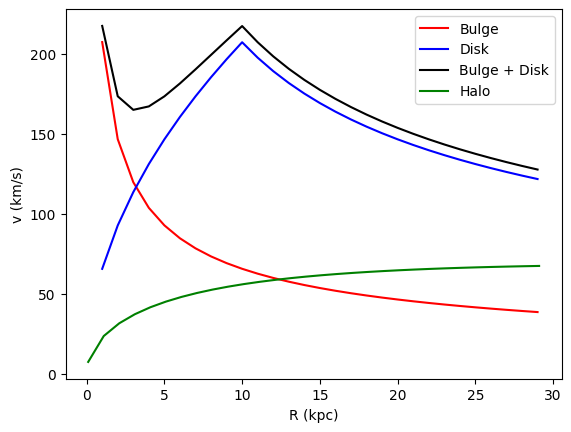

In [25]:
plt.plot(r_arr.to(u.kpc), V_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(r_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(r_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") #Plotting the Halo
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [31]:
M_MilkyWay = M_Bulge + M_disk + M_halo # Total mass of the milky way including all the components
R_MilkyWay = 39.5 * u.kpc
print(M_MilkyWay.to(1e6 * u.solMass))
print(R_MilkyWay.to(u.kpc))

[10001.24830635 10141.554184   10484.83174362 10995.37817247
 11644.19253812 12407.54787731 13265.90579447 14203.08246475
 15205.60143686 16262.18680046 17363.36292375 18501.13588267
 19668.73807022 20860.42207485 22071.2932776  23297.17309674
 24534.48665556 25780.17003672 27031.59333812 28286.49654836
 29542.9358776  30799.23865839 32053.96530404 33305.87710535
 34553.90887727 35797.14565078 37034.80275178 38266.20872589
 39490.79066316 40708.06155284] 1e+06 solMass
39.5 kpc


In [34]:
!pip install astropy

import numpy as np
import astropy.units as u
import astropy.constants as ac

def cal_Orbital_V(M_MilkyWay, R_MilkyWay):
  """
  Function to cal orbitabl velo
  M, Mass of the object
  R, Radius of the object
  """

  V_Milky = np.sqrt((ac.G*M_MilkyWay)/R_MilkyWay)
  return(V_Milky)

In [35]:
V_Milky = cal_Orbital_V(M_MilkyWay, R_MilkyWay) #Calls function to assign V_Milky
print(V_Milky.to(u.km/u.s))

[32.99963236 33.2302994  33.78801897 34.60087504 35.60710667 36.75572355
 38.00585009 39.32541378 40.68963536 42.07958706 43.48093936 44.88292924
 46.27753788 47.6588482  49.02254878 50.36555336 51.68570974 52.98157753
 54.2522581  55.4972645  56.71642164 57.90978961 59.0776046  60.22023337
 61.33813802 62.43184881 63.50194311 64.54902915 65.57373347 66.57669128] km / s


In [36]:
#Comparing to actual measurements, so import real data
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [37]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

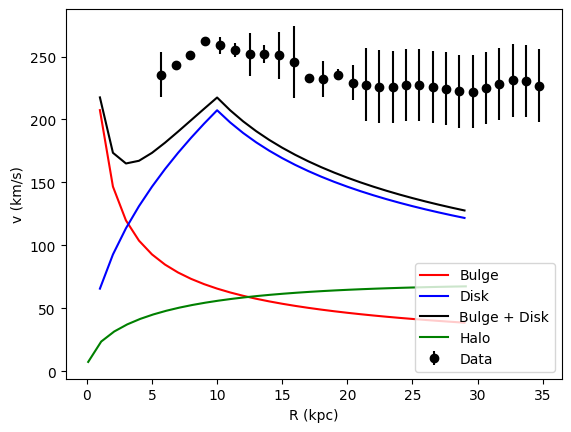

In [38]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot calculations, basically copy and paste from the previous plotting coding cell
plt.plot(r_arr.to(u.kpc), V_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(r_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(r_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") #Plotting the Halo
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()